# Part II - (Effects of employment status, average credit score and recommendations on loan status)
## by (Aratunde Temitayo Samuel)


## Investigation Overview

In this investigation, i want to look at which of the features of a loan could be use to predict its' complete or default status. The main focus will be on `employment status`, `average credit score` and `recommendations count`.


## Dataset Overview

This dataset contains information regarding 113937 prosper loan data which includes loan status and other attributes such as borrower rate (or interest rate), employment status, recommendations count, borrower income, and many others.

The dataset was subset for only values of loan status that includes `Completed, Defaulted or chargedOff` and also for credit score range greater or equals 400.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# subset and create required column
prosper_loan['AverageCreditScore'] = (prosper_loan.CreditScoreRangeUpper + prosper_loan.CreditScoreRangeLower)/2
prosper_loan_sub = prosper_loan.query('LoanStatus in ["Completed", "Defaulted", "Chargedoff"] &\
                                     AverageCreditScore>=400')

## Loan Status Distribution

Loan status is a categorical variable and the count plot shows that there are more completed loans in this dataset than there are defaults.

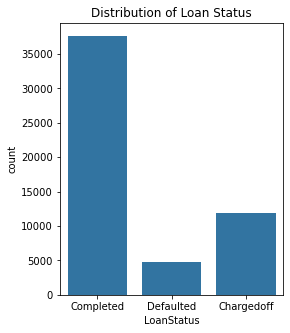

In [4]:
plt.figure(figsize=(4, 5));
b_color=sb.color_palette()[0]
sb.countplot(x='LoanStatus', data=prosper_loan_sub, color=b_color)
plt.title('Distribution of Loan Status');

## Distribution of Employment Status

The employment status distribution shows that there are more employed people in our dataset than there are unemployed.

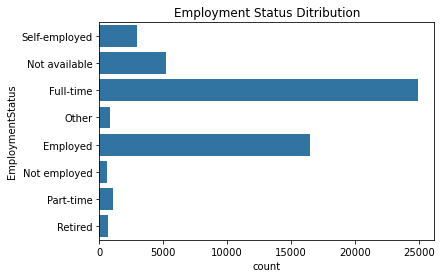

In [5]:
sb.countplot(y='EmploymentStatus', data =prosper_loan_sub, color= b_color);
plt.title('Employment Status Ditribution');

## Distribution of Average Credit Score

The distribution of the average credit score looks slightly normal with most values concentrated between  600 to 800.

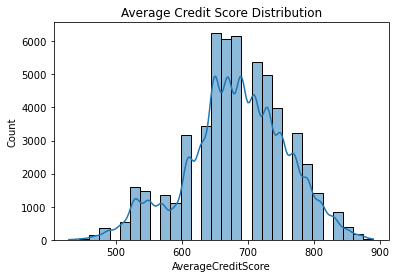

In [6]:
sb.histplot(x='AverageCreditScore', data=prosper_loan_sub, bins=30, kde=True)
plt.title('Average Credit Score Distribution');

## Recommendation count distribution

This distribution shows that most count fall below 10 with only a few of the values above 10

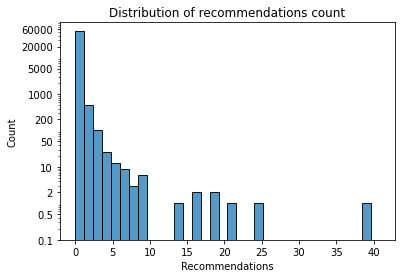

In [7]:
bins = np.arange(0, 40+1.2, 1.2)
sb.histplot(x='Recommendations', data=prosper_loan_sub, bins=bins);
plt.yscale('log')
yticks= [0.1, 0.5, 2, 10, 50, 200, 1000, 5000, 20000, 60000]
plt.yticks(yticks, yticks)
plt.title('Distribution of recommendations count');

## Loan Status vs Employment Status

Majority of the people granted loans tends to be employed and have verifiable income sources. The following observation can be made based on this distribution.

1. Loans granted to those who are fully employed (Employed, Full-time, Part-time) have a higher count of completion  than defaults.

2. Loans granted to other categories apart from the ones mentioned above have defaults count >= to 50% of their completion count.

This suggest that those who are fully employed will be less likely inclined to default than those who are not.

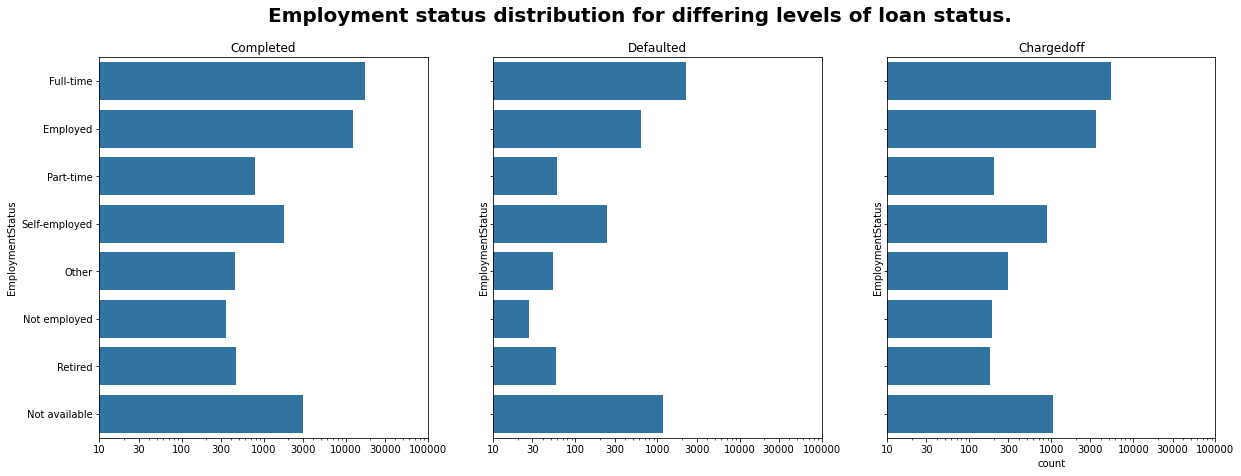

In [8]:
fig, ax=plt.subplots(ncols=3, figsize=(20,7), sharex=True, sharey=True)
xticks=[10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
y_order = ['Full-time', 'Employed', 'Part-time', 'Self-employed', 'Other', 'Not employed', 'Retired', 'Not available']

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Completed"'), y='EmploymentStatus', ax=ax[0], color=b_color, order=y_order)
ax[0].set_title('Completed')
ax[0].set_xlabel('')

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Defaulted"'), y='EmploymentStatus', ax=ax[1], color=b_color, order=y_order)
ax[1].set_title('Defaulted')
ax[1].set_xlabel('')

sb.countplot(data=prosper_loan_sub.query('LoanStatus=="Chargedoff"'), y='EmploymentStatus', ax=ax[2], color=b_color, order=y_order)
ax[2].set_title('Chargedoff')

plt.xscale('log')
plt.xticks(xticks,xticks);
fig.suptitle('Employment status distribution for differing levels of loan status.', fontsize=20, fontweight='bold');

### Loan Status and employment status by average credit score

Those who are fully employed tend to complete their loans. Also those who are fully employed but end up defaulting have lower average credit score than those who completed their loans. Also we can see that the people with the highest chance of defaulting are those who choose `Not available` as their employment status and most of them also have average credit score below 650.

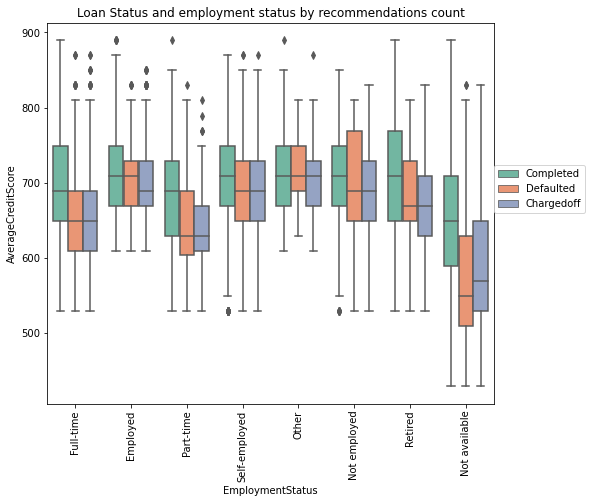

In [9]:
fig, ax=plt.subplots(nrows=1, figsize=(8, 7))
sb.boxplot(data=prosper_loan_sub, y='AverageCreditScore', 
           color=b_color, order=y_order, x='EmploymentStatus', ax=ax, hue='LoanStatus', palette='Set2')
plt.legend(loc=(1, 0.5))
plt.xticks(rotation=90)
plt.title('Loan Status and employment status by recommendations count');

### Loan Status and employment status by recommendations count

Those in the fulltime employment category have more recommendations than those in other categories with them also completing their loans.

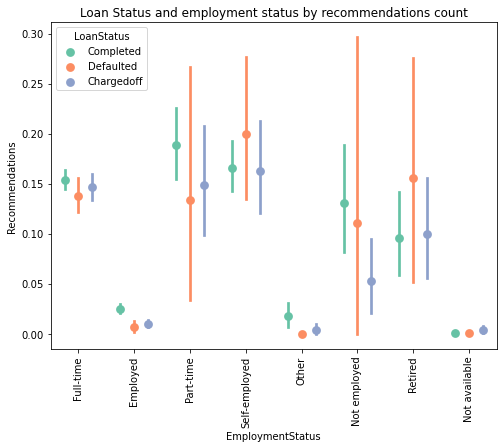

In [10]:
fig, ax = plt.subplots(nrows=1, figsize=(8,6))
sb.pointplot(x='EmploymentStatus', y='Recommendations', data=prosper_loan_sub, 
             hue='LoanStatus', ax=ax, join=False, dodge=0.5, order=y_order, palette='Set2')
plt.xticks(rotation=90)
plt.title('Loan Status and employment status by recommendations count');

In [11]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C
